# Self Organizing Maps - Caso de estudio utilizando datos de afluentes

## Técnica
* Uso de librería sompy - https://github.com/sevamoo/SOMPY/blob/4c51a3ddc1d6a78d2976f9638daec561050b3d4d/sompy/visualization/mapview.py
* Organización utilizando (temperatura, pH, conductividad y O.D.)
* Visualización de la presencia de macroinvertebrados
* Visualización de puntajes de calidad sobrepuesto en el mapa.


## Problema
Visualización de datos de una manera estructurada<br/>


### Sección 1.1 - Importación y ejecución de entranamiento
**Saltar a sección 1.2** para resultados

In [1]:
"""
Created on Fri Mar 23 12:04:26 2018

@author: carlos
"""

import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from time import time
import sompy

In [3]:
df = pd.read_csv('datos_de_entrenamiento.csv', encoding='utf-8')
names = df['ID sitio']
scores = df['Calidad']
sensors_df = df.loc[:, 'Temperatura':'OD']
sensors = sensors_df.values

In [113]:
# Training stage
mapsize = [30,20]
som = sompy.SOMFactory.build(data, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')  # this will use the default parameters, but i can change the initialization and neighborhood methods
#som.train(n_job=1, verbose='info')  # verbose='debug' will print more, and verbose=None wont print anything
som.train(n_job=1, verbose=None)  # verbose='debug' will print more, and verbose=None wont print anything

maxtrainlen %d inf
maxtrainlen %d inf


## Sección 1.2 - Visualización
### 1.2.1 - Visualización del mapa por atributo

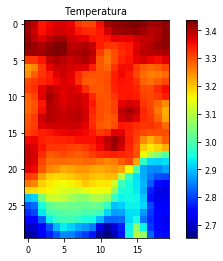

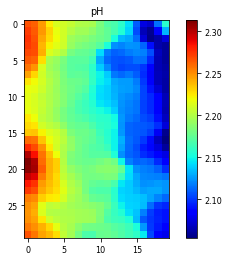

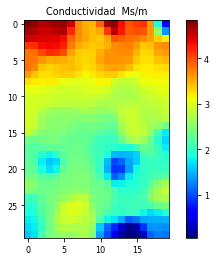

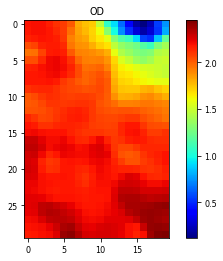

In [95]:
coord = np.array(som.bmu_ind_to_xy(som.project_data(data)))
coord = coord[:,:-1]

som.component_names = sensors_df.columns

###########
########## Single attr heatmap
#########
l = list(map(lambda x: 1 if x == 1 else '', df['Gomphidae']))
l = None
for i in range(0,4):
    #codebook = som.codebook.matrix
    codebook = som._normalizer.denormalize_by(data, som.codebook.matrix)
    msz0, msz1 = som.codebook.mapsize
    compname = som.component_names
    
    mp = codebook[:, i].reshape(msz0, msz1)
    plt.imshow(mp[::-1], norm=None, cmap='jet')
    plt.title(compname[0][i])
    plt.colorbar()
    
    if l:
        for i, m in enumerate(coord):
            label = l[i]
            plt.text(m[1], m[0], label)

    plt.show()

#########
##########
###########


### 1.2.2 - Visualización U-Matrix con etiquetado por familia de macroinvertebrado

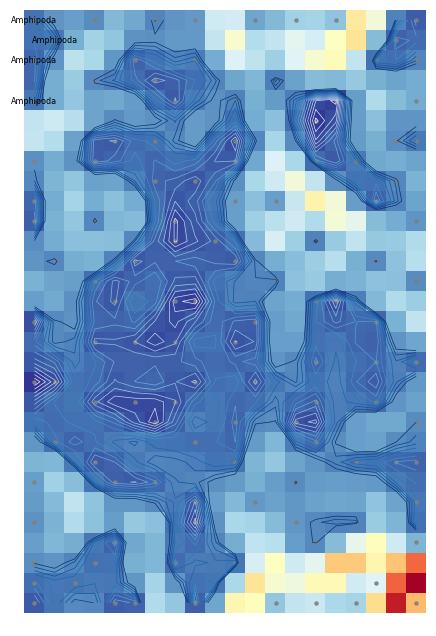

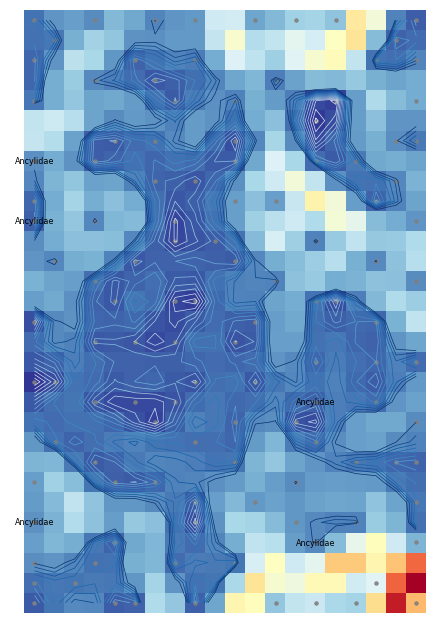

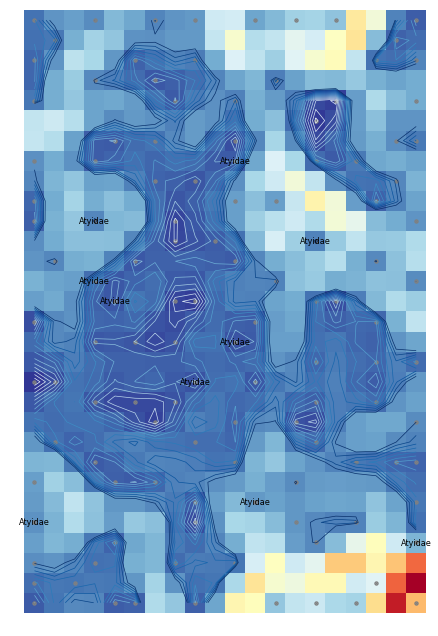

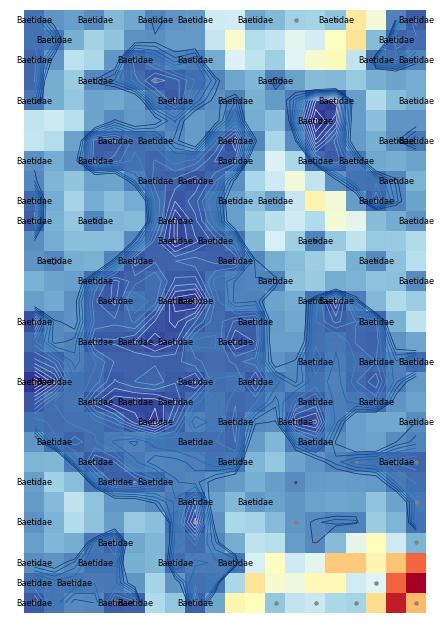

In [100]:
#Here you have Umatrix plus its render
l = list(df['ICA'])
l = list(df['ID sitio'])
l = list(df['Calidad'])

#bugdf = df.loc[:, 'Amphipoda':'Tubificidae']
bugdf = df.loc[:, 'Amphipoda':'Baetidae']
bugnames = bugdf.columns

l = []
for i, name in enumerate(bugnames):
    aux_list = list(bugdf[name])
    aux_list = list(map(lambda x: name if x == 1 else '', aux_list))
    
    #"""
    if i ==0:
        l = aux_list
    else:
        l = [(str(m)+'|'+str(n)) if n else str(m) for m,n in zip(l, aux_list)]
    #"""
    
    UMAT = u.show(som, distance2=1, row_normalized=False, show_data=True, contooor=True, blob=False, labels=aux_list)

### 1.2.3 - Visualización por atributo con etiquetado por familia de macroinvertebrado

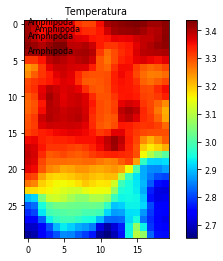

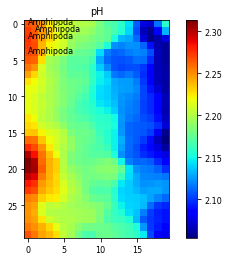

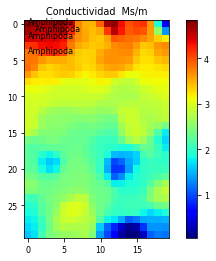

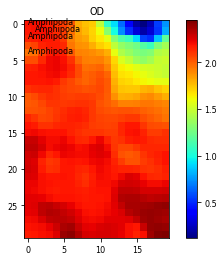

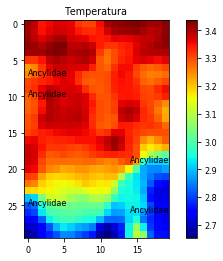

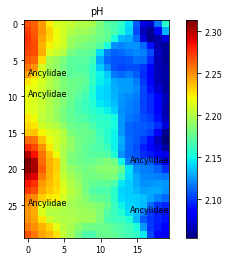

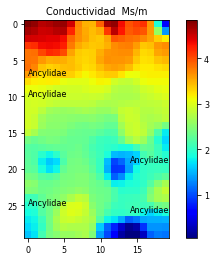

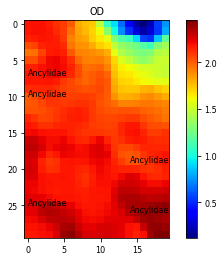

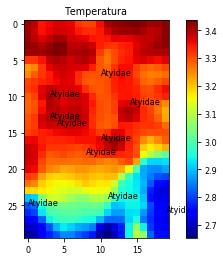

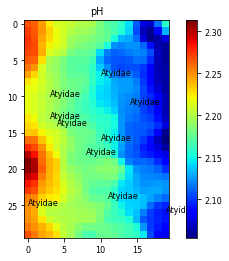

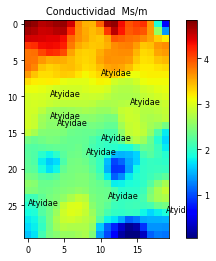

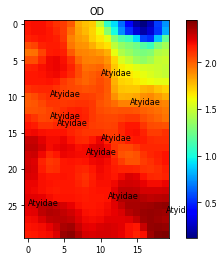

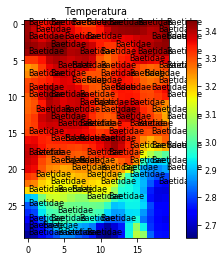

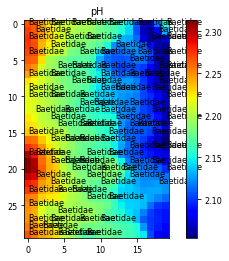

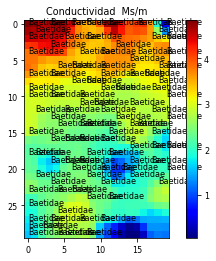

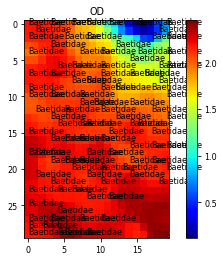

In [102]:
#bugdf = df.loc[:, 'Amphipoda':'Tubificidae']
bugdf = df.loc[:, 'Amphipoda':'Baetidae']
bugnames = bugdf.columns

l = []
for i, name in enumerate(bugnames):
    aux_list = list(bugdf[name])
    aux_list = list(map(lambda x: name if x == 1 else '', aux_list))
    
    """
    if i ==0:
        l = aux_list
    else:
        l = [(str(m)+'|'+str(n)) if n else str(m) for m,n in zip(l, aux_list)]
    """
    l = aux_list
    
    for i in range(0,4):
        #codebook = som.codebook.matrix
        codebook = som._normalizer.denormalize_by(data, som.codebook.matrix)
        msz0, msz1 = som.codebook.mapsize
        compname = som.component_names

        mp = codebook[:, i].reshape(msz0, msz1)
        plt.imshow(mp[::-1], norm=None, cmap='jet')
        plt.title(compname[0][i])
        plt.colorbar()

        if l:
            for i, m in enumerate(coord):
                label = l[i]
                plt.text(m[1], m[0], label)

        plt.show()

### 1.2.4 - Visualización por puntaje de calidad y por id sitio

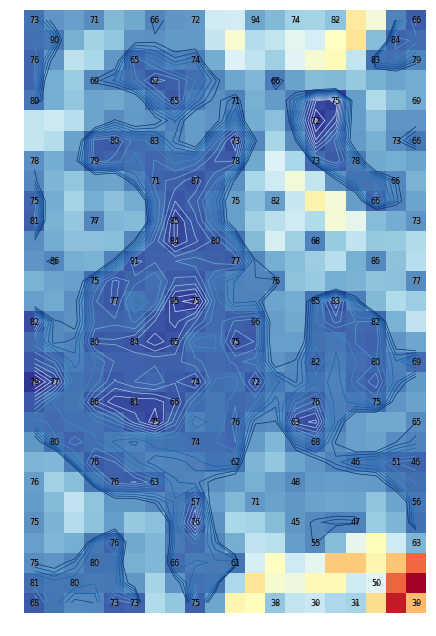

In [107]:
l = list(df['Calidad'])
UMAT = u.show(som, distance2=1, row_normalized=False, show_data=True, contooor=True, blob=False, labels=l)

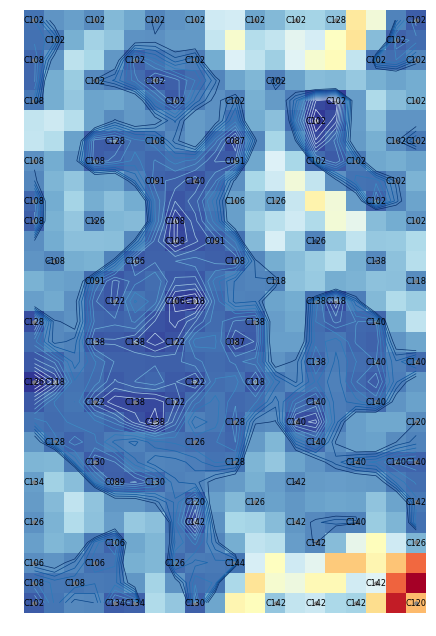

In [112]:
l = list(df['ID sitio'])
l = list(map(lambda x: x[0:4], l))
UMAT = u.show(som, distance2=1, row_normalized=False, show_data=True, contooor=True, blob=False, labels=l)